# Chapter 5 - Net Present Value and Other Investment Rules

**Selected Exercises**

Corporate Finance 9th International Edition

Ross, Westerfield, Jaffe

In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

%matplotlib inline

#Lets define some functions so we can use them later

def dual_bar(df, title):
    
    # Set the figure size to be practical for a Jupyter Notebook
    plt.figure(figsize=(8, 6))

    # Plot cash flows for Project A
    plt.bar(df['Year'], df['Project_A'], label='Project A', color='blue', alpha=0.7)

    # Plot cash flows for Project B
    plt.bar(df['Year'], df['Project_B'], label='Project B', color='green', alpha=0.5)

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Cash Flow')
    plt.title(title)
    plt.legend()

    # Show plot
    plt.show()

def present_value_amount(amount, rate, periods):
    """Returns the present value of $1"""
    
    pv_fact = 1 / (1 + rate)**(periods)
    
    return pv_fact * amount
    
def payback(flow):
    """Returns Payback Period of a series."""

    pb = 0
    cumulative = np.cumsum(flow)
    
    for i, v in enumerate(cumulative):
        
        if v >= 0:
            pb = (i - 1) + (abs(cumulative[i - 1]) / flow[i])
            break
            
    return pb

**1. Calculating Payback Period and NPV** - Fuji Software, Inc has the following mutually exclusive projects:

In [ ]:
"""
Year    Project A    Project B
0        -10,000      -12,000
1          6,500        7,000
2          4,000        4,000
3          1,800        5,000

a. Suppose Fuji's payback period cutoff is two years. 
Which of these two projects should be chosen?

b. Suppose Fuji uses the NPV rule to rank these two projects.
Which project should be chosen if the appropriate discount rate
is 15 percent?
"""

In [53]:
#Read data
df = pd.DataFrame([[0, -10000, -12000],
                  [1, 6500, 7000],
                  [2, 4000, 4000],
                  [3, 1800, 5000]],
                 columns=("Year", "Project_A", "Project_B"))

# Lets create an object for evaluation
projects = {
    "Measures" : ["Payback", "NPV"],
    "Project A" : [payback(df['Project_A']), npf.npv(.15, df['Project_A'])],
    "Project B" : [payback(df['Project_B']), npf.npv(.15, df['Project_B'])]
}

#Format DataFrame Style
results = pd.DataFrame(projects)
results['Project A'] = results['Project A'].map('{:,.2f}'.format)
results['Project B'] = results['Project B'].map('{:,.2f}'.format)

#Lets visualize the data
print(df.to_string(index=False))

 Year  Project_A  Project_B
    0     -10000     -12000
    1       6500       7000
    2       4000       4000
    3       1800       5000


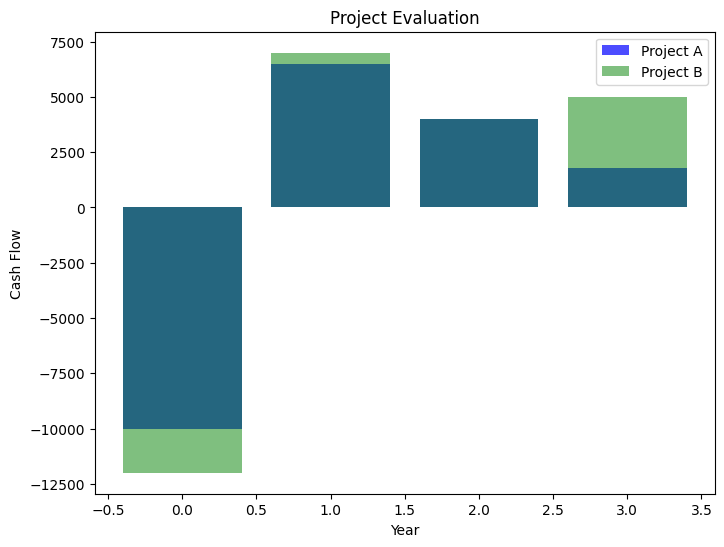

In [59]:
dual_bar(df, 'Project Evaluation')

In [55]:
# Lets visualize the results
results

,Measures,Project A,Project B
0,Payback,1.88,2.20
1,NPV,-139.72,399.11


**Analysis**
* `Payback Period` - Since Project A has a shorter payback period than Project B has, the company should choose project A.
* `Net Present Value` - The Firm should choose Project B since it has a higher NPV than Project A has.

**2. Calculating Payback** - An investment project provides cash inflows of 970 per year for eight years.  What is the project payback period if the initial cost is 4,100? What if the initial cost is 6,000? What if it is 8,000?

In [111]:
investments = [-4100, -6000, -8000]

projects = {
    "Years" : [x for x in range(0, 9)],
    "Project A" : [970] * 8,
    "Project B" : [970] * 8,
    "Project C" : [970] * 8,
}

count = 0
paybacks = []

for k, v in projects.items():
    if k == "Years" or k == "Payback":
        continue
    else:
        v.insert(0, investments[count])
        pb_value = payback(v)
        paybacks.append(pb_value)
        count += 1

#Format DataFrame Styles
df = pd.DataFrame(projects)
df.loc[len(df)] = ['Payback'] + paybacks
df['Project A'] = df['Project A'].map('{:,.2f}'.format)
df['Project B'] = df['Project B'].map('{:,.2f}'.format)
df['Project C'] = df['Project C'].map('{:,.2f}'.format)
print(df.to_string(index=False))

  Years Project A Project B Project C
      0 -4,100.00 -6,000.00 -8,000.00
      1    970.00    970.00    970.00
      2    970.00    970.00    970.00
      3    970.00    970.00    970.00
      4    970.00    970.00    970.00
      5    970.00    970.00    970.00
      6    970.00    970.00    970.00
      7    970.00    970.00    970.00
      8    970.00    970.00    970.00
Payback      4.23      6.19      0.00


**Analysis**

Project A should be chosen over all other projects because it has the lowest payback period. Project C, in reality has a payback period of 8.25 but that means there is not a complete recovery of the investment, hence the algorithm returns 0 because there is no payback period.